### Proyecto final EOI Python - parte de DATA

###### Alumno: José Luis González Olmos

El objetivo del proyecto final, y por tanto de este cuaderno de JupyterLab, es estudiar un conjunto de datos relacionados con el precio de unas casas. Tras esto se realizará un programa al que indicandole las características de una casa y un precio nos diga si es o no un buen precio para las caracterísiticas que contiene.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Cargamos el conjunto de datos
houses = pd.read_csv('HousePrices_HalfMil.csv')

#### Análisis Exploratorio de los Datos


In [3]:
#Una vez tenemos los datos cargados vamos a explorar su composición
houses.info()
print("Contamos con 500.000 entradas, en las cuales no hay ningúna fila que contenga en su interior un valor vacío o nulo")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Area           500000 non-null  int64
 1   Garage         500000 non-null  int64
 2   FirePlace      500000 non-null  int64
 3   Baths          500000 non-null  int64
 4   White Marble   500000 non-null  int64
 5   Black Marble   500000 non-null  int64
 6   Indian Marble  500000 non-null  int64
 7   Floors         500000 non-null  int64
 8   City           500000 non-null  int64
 9   Solar          500000 non-null  int64
 10  Electric       500000 non-null  int64
 11  Fiber          500000 non-null  int64
 12  Glass Doors    500000 non-null  int64
 13  Swiming Pool   500000 non-null  int64
 14  Garden         500000 non-null  int64
 15  Prices         500000 non-null  int64
dtypes: int64(16)
memory usage: 61.0 MB
Contamos con 500.000 entradas, en las cuales no hay ningúna fila que conten

In [4]:
#Vemos una muestra de los datos
houses.head()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
0,164,2,0,2,0,1,0,0,3,1,1,1,1,0,0,43800
1,84,2,0,4,0,0,1,1,2,0,0,0,1,1,1,37550
2,190,2,4,4,1,0,0,0,2,0,0,1,0,0,0,49500
3,75,2,4,4,0,0,1,1,1,1,1,1,1,1,1,50075
4,148,1,4,2,1,0,0,1,2,1,0,0,1,1,1,52400


In [5]:
#Una primera vista de los datos de cada columna
houses.describe()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.00000,500000.000000,500000.00000,500000.000000,500000.000000,500000.000000
mean,124.929554,2.001290,2.003398,2.998074,0.332992,0.332690,0.334318,0.499386,2.000940,0.498694,0.50065,0.500468,0.49987,0.500436,0.501646,42050.139350
std,71.795363,0.817005,1.414021,1.414227,0.471284,0.471177,0.471752,0.500000,0.816209,0.499999,0.50000,0.500000,0.50000,0.500000,0.499998,12110.237201
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,7725.000000
25%,63.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,33500.000000
50%,125.000000,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.00000,1.000000,0.00000,1.000000,1.000000,41850.000000
75%,187.000000,3.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,50750.000000
max,249.000000,3.000000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,77975.000000


In [6]:
#Vamos a eliminar los posibles outliers con respecto al precio
Q1 = houses["Prices"].describe()['25%']
Q3 = houses["Prices"].describe()['75%']
IQR = Q3 - Q1

lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

houses = houses[houses["Prices"].between(Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)]

In [7]:
#Podemos ver como se han descartado 16 filas por ser consideradas como outliers.
#Estos datos correspondian a los valores más altos. Pasando el máximo de precio de 77.975 a 76.600
houses.describe()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
count,499984.000000,499984.000000,499984.000000,499984.000000,499984.000000,499984.000000,499984.000000,499984.00000,499984.000000,499984.000000,499984.000000,499984.000000,499984.000000,499984.000000,499984.000000,499984.000000
mean,124.926080,2.001258,2.003344,2.998016,0.332971,0.332701,0.334329,0.49937,2.000908,0.498688,0.500636,0.500452,0.499854,0.500438,0.501644,42049.015719
std,71.793858,0.816999,1.414009,1.414211,0.471277,0.471181,0.471756,0.50000,0.816202,0.499999,0.500000,0.500000,0.500000,0.500000,0.499998,12108.801754
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7725.000000
25%,63.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33500.000000
50%,125.000000,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.00000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,41850.000000
75%,187.000000,3.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.00000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50750.000000
max,249.000000,3.000000,4.000000,5.000000,1.000000,1.000000,1.000000,1.00000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,76600.000000


##### Una vez que nos hemos asegurado de que tenemos los datos limpios, vamos a ver la relación que hay entre los distintos campos y el precio

<Axes: >

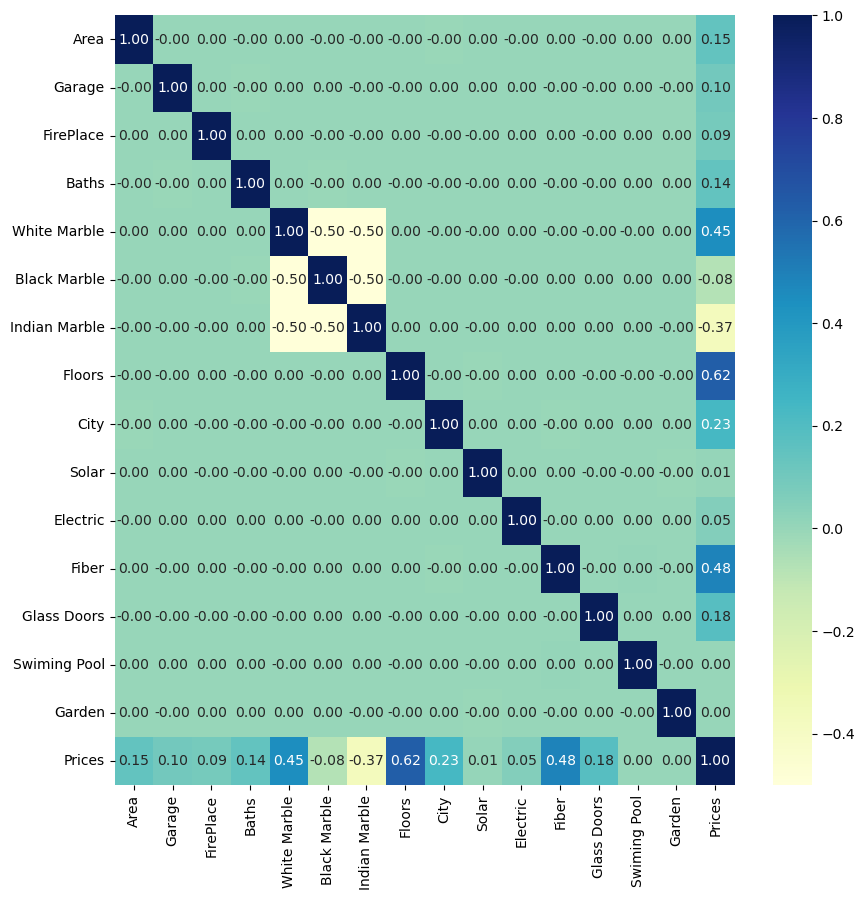

In [8]:
#Realizamos un mapa de calor para ver visualmente las relaciones
plt.figure(figsize=(10,10)) 
sns.heatmap(data=houses.corr(numeric_only=True),annot=True, fmt=".2f",cmap="YlGnBu")

Encontramos que existe una relación entre el número de plantas (floors) y el precio, ya que el coeficiente supera el 0.5 (0.62). Lo cual nos indica que hay una relación positiva que indica que una casa con más plantas tendrá un mayor precio.Vamos a estudiar los más relevantes con respecto al precio:

- Area
- City
- Floors
- Marbles

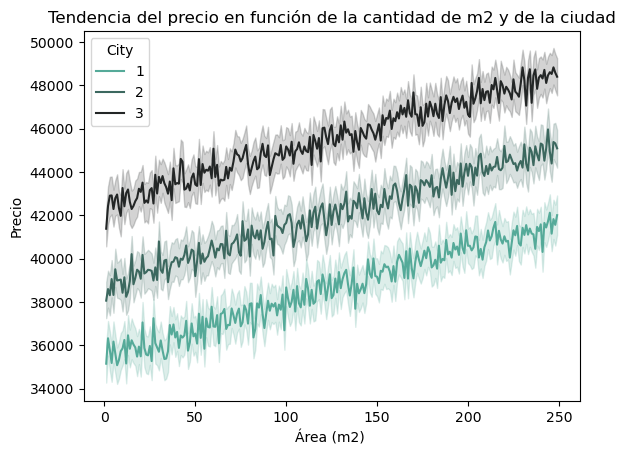

In [9]:
#El área al ser una variable continua la vamos a estudiar con un gráfico de líneas, comparando las distintas ciudades
sns.lineplot(x='Area', y="Prices", data=houses, hue="City", palette="dark:#5A9_r")

plt.xlabel('Área (m2) ')
plt.ylabel('Precio')
plt.title('Tendencia del precio en función de la cantidad de m2 y de la ciudad')
plt.show()

In [10]:
def asignar_valor(row):
    if row['White Marble'] == 1:
        return 1
    elif row['Black Marble'] == 1:
        return 2
    elif row['Indian Marble'] == 1:
        return 3

houses['Marble Type'] = houses.apply(asignar_valor, axis=1)

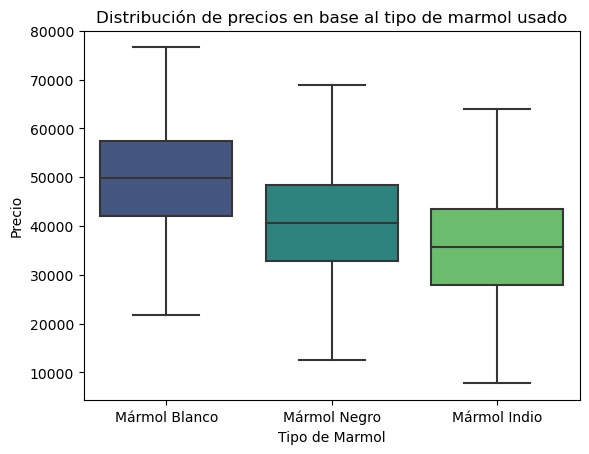

In [11]:
sns.boxplot(x='Marble Type', y='Prices', data=houses, palette="viridis")
plt.xlabel('Tipo de Marmol')
plt.ylabel('Precio')
plt.title('Distribución de precios en base al tipo de marmol usado')

nuevos_nombres = {1: 'Mármol Blanco', 2: 'Mármol Negro', 3: 'Mármol Indio'}
plt.xticks(ticks=[0, 1, 2], labels=[nuevos_nombres[val] for val in [1, 2, 3]])

plt.show()

In [12]:
#Eliminamos la columna creada para el gráfico
houses = houses.drop('Marble Type', axis=1)

<Axes: xlabel='Area', ylabel='Prices'>

C:\Users\Jlu\anaconda3\envs\MLearning\Lib\site-packages\IPython\core\events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\Jlu\anaconda3\envs\MLearning\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


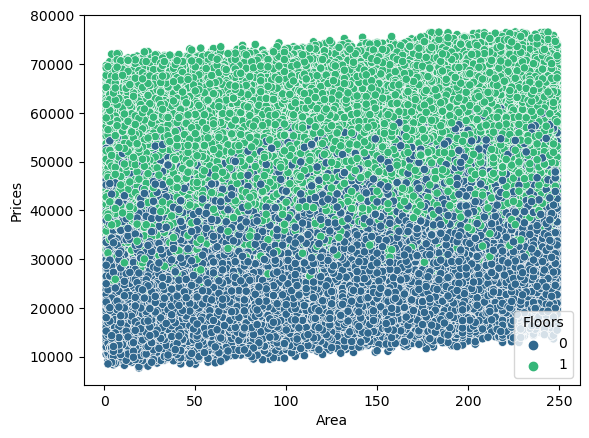

In [13]:
sns.scatterplot(data=houses, x="Area", y="Prices", hue="Floors", palette="viridis")

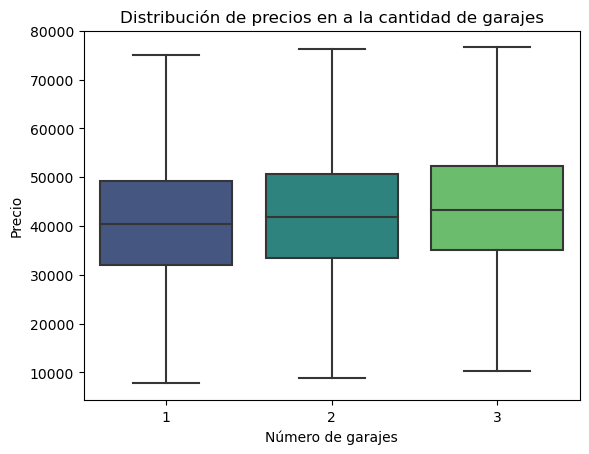

In [14]:
#variación del precio en función del número de garajes
sns.boxplot(x='Garage', y='Prices', data=houses, palette="viridis")
plt.xlabel('Número de garajes')
plt.ylabel('Precio')
plt.title('Distribución de precios en a la cantidad de garajes')
plt.show()

Text(0.5, 1.0, 'Distribución de precios en a la cantidad de chimeneas')

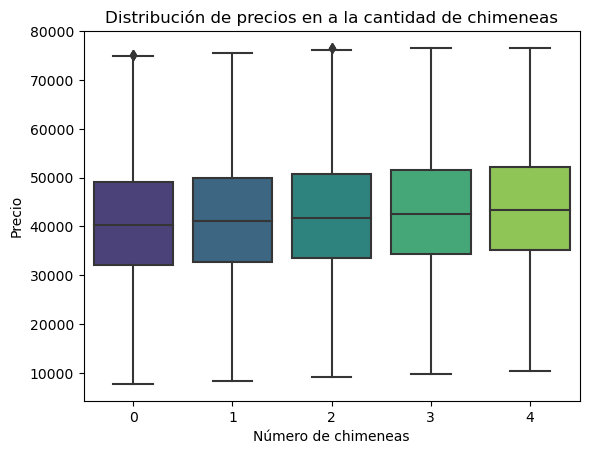

In [15]:
#variación del precio en función del número de garajes
sns.boxplot(x='FirePlace', y='Prices', data=houses, palette="viridis")
plt.xlabel('Número de chimeneas')
plt.ylabel('Precio')
plt.title('Distribución de precios en a la cantidad de chimeneas')

##### Conclusiones de las relaciones:

Una vez visto la forma en la que se distribuyen los precios en función de sus caracterísitcas más relevantes podemos afirmar que:

 - A mayor área mayor será el precio
 - La ciudad 3 tiene el precio por metro cuadrado más caro y la ciudad 1 el más barato
 - De los Mármoles encontramos que el blanco lo encontramos más veces en las casas más caras y el marmol índio en las más baratas
 - Una casa que ocupa el mismo área es más cara con dos plantas (ya que el espacio habitable es el doble)
 
Podemos ver que las características que tienen una baja correlación (por debajo de 0.5) como el número de chimeneas o de garajes influye muy poco en el precio final ya que las otras características modifican más el precio.


Estos datos nos dan la tendencia general del precio en función de sus características más importantes, pero no podemos determinar si una casa es cara o barata por sí sola. Esto es porque necesitamos el contexto de las demás, ya que un precio caro si se mantiene fijo con el paso de los años acabará por perder valor si todos los demás inmuebles suben.

Es por ello que nuestro análisis se basará en predecir el precio de una casa con unas determinadas características, basandonos en el conjunto de datos que tenemos y una vez obtengamos el precio lo compararemos con el precio de venta al público determinando si es o no una buena compra.



### Entrenamiento del modelo de Regresión lineal

Una vez tenemos una idea general sobre como varía el mercado de las casas en función a sus características vamos a realizar una regresión lineal para precedir el precio de una casa en función de las características de esta. Con este modelo crearemos el programa que indicará al usuario si la casa que ha introducido es buena compra.

In [16]:
#Asignamos las variables independientes y la dependiente(el precio depende de las demás caracterísiticas)
X = houses.drop('Prices', axis=1)
y = houses['Prices']

In [17]:
#Creación del conjunto de entrenamiento, usamos el 20% de los datos para realizar los test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
#Creamos el modelo de regresión lineal
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [19]:
# Entrenamos el modelo con los datos de entrenamiento (80%)
lin_reg.fit(X_train, y_train)

LinearRegression()

In [20]:
# Hacemos las prediciones utilizando solo las variables independientes de los casos de prueba
y_pred = lin_reg.predict(X_test)

In [21]:
#Obtenemos los precios para los valores máximos y mínimos del conjunto x de entrenamiento
prices_X_min_max = np.array([y_train.min(),y_train.max()])
prices_X_min_max

array([ 7975, 76600])

In [22]:
#Buscamos el index de las entradas de esos precios y creamos un data set para esas dos entradas
indice_min = y_train.idxmin()
indice_max = y_train.idxmax()

# Crea un nuevo DataFrame con las entradas correspondientes
X_min_max = X_train.loc[[indice_min, indice_max]]
X_min_max

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden
242549,19,1,0,1,0,0,1,0,1,1,0,0,0,1,0
35902,226,3,3,5,1,0,0,1,3,0,1,1,1,0,1


In [23]:
#Utilizamos las dos entradas para predecir los precios
y_train_pred = lin_reg.predict(X_min_max)

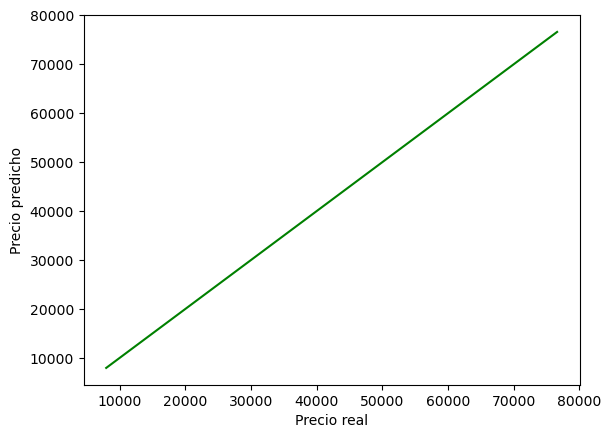

In [24]:
# Representación gráfica de la función hipótesis generada, utilizamos los precios reales y los predichos
plt.plot(prices_X_min_max, y_train_pred, "g-")
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.show()

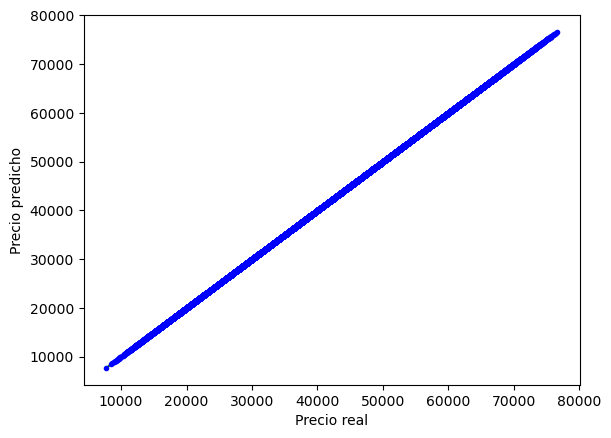

In [25]:
plt.plot(prices_X_min_max, y_train_pred, "g-")
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")

#Pintamos los precios reales del conjunto de test y sus predicciones
plt.plot(y_test, y_pred, "b.")

plt.show()

Podemos ver como el modelo es muy exacto y predice los precios de los test muy cercano a la línea de tendencia. A continuación vamos a ver distintas métricas que medirán el nivel de error de nuestro modelo

### Metricas

**RMSE** (Root Mean Squared Error):

In [26]:
from sklearn import metrics 
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))  
print("RMSE Value: ",rmse)  

RMSE Value:  7.320020373718509e-11


Como podemos ver el valor es muy cercano a cero por lo que podemos afirmar que el modelo se ajusta muy bien a los datos

**MSE** (Mean Squared Error):

In [27]:
print("MSE Value: ", metrics.mean_squared_error(y_test,y_pred))  

MSE Value:  5.358269827165406e-21


Un valor bajo de MSE, como el que tiene este modelo, indica que tiene un bajo error cuadrático medio.

**Accuracy** (Precisión):

In [28]:
print("Accuracy Value: ", 1 - metrics.mean_absolute_error(y_test,y_pred)/np.mean(y))  

Accuracy Value:  0.9999999999999986


Mide la capacidad del modelo para predecir correctamente los valores reales. Un valor alto de precisión, como el de nuestro modelo, indica que tiene un alto porcentaje de acierto

### Utilización del modelo para predecir

Una vez tenemos nuestro modelo entrenado y hemos comprobado que las predicciones que hace son buenas vamos a realizar un programa que le muestre al usuario la desviación del precio de la casa con respecto a las que hay en el mercado

In [29]:
#Creamos un conjunto de datos sobre el que queremos inferir el precio
consulta = {'Area': 185, 
            'Garage': 2, 
            'FirePlace': 1, 
            'Baths': 3, 
            'White Marble': 1, 
            'Black Marble': 0, 
            'Indian Marble': 0, 
            'Floors': 1, 
            'City': 3, 
            'Solar': 0, 
            'Electric': 1, 
            'Fiber': 0, 
            'Glass Doors': 1, 
            'Swiming Pool': 1, 
            'Garden': 1}

precio_venta = 30000

In [30]:
#Lo convertimos en un dataframe
x_new = pd.DataFrame([consulta])

In [31]:
#Predecimos el precio para ese conjunto de características
y_new_pred = lin_reg.predict(x_new) 
y_new_pred

array([58325.])

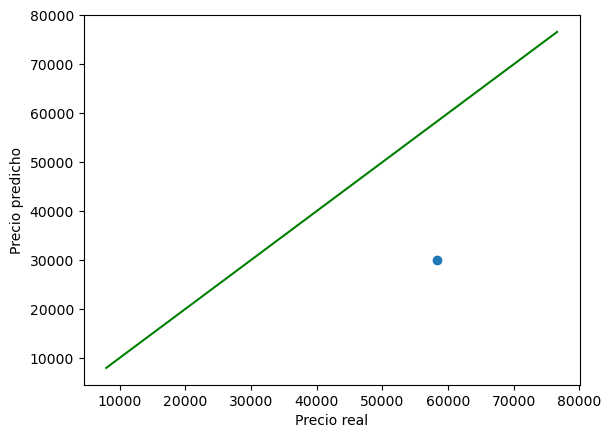

El precio promedio de una casa de esas características es: 58325.0


In [32]:
# Representación de la desviación del precio ofrecido con respecto al mercado
plt.plot(prices_X_min_max, y_train_pred, "g-")
plt.scatter(y_new_pred, precio_venta)
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.show()

print(f"El precio promedio de una casa de esas características es: {(y_new_pred[0]).round()}")

In [33]:
#Creamos una función para que pueda ser usada en conjunto

def calculo_precio(casa, precio,fluctuacion_precio):
    x_new = pd.DataFrame([casa])
    y_new_pred = lin_reg.predict(x_new) 
    
    plt.plot(prices_X_min_max, y_train_pred, "g-")
    plt.scatter(y_new_pred, precio)
    plt.xlabel("Precio real")
    plt.ylabel("Precio predicho")
    plt.show()

    print(f"El precio promedio de una casa de esas características es: {(y_new_pred[0]).round()}")
 
    precios = precio > y_new_pred[0]
    diferencia = precio - y_new_pred[0]
    s = f"Es {(diferencia).round()} euros más caro" if precios else f"Es {(diferencia*-1).round()} euros más barato"
    print(s)
    
    if ((diferencia) > fluctuacion_precio):
        print("Opinión final: No es buena compra, su precio es caro comparado con el mercado actual")
    elif ((diferencia) < fluctuacion_precio) and ((diferencia) > -fluctuacion_precio):
        print("Opinión final: El precio es normal comparado con el mercado actual")
    else:
        print("Opinión final: Es muy buena compra, su precio es más bajo que el mercado actual")

In [34]:
import joblib

# Guardar el modelo entrenado en un archivo
joblib.dump(lin_reg, 'model_houses_trained.pkl')

['model_houses_trained.pkl']

In [35]:
# Para cargar el modelo entrenado desde el archivo usamos
#model = joblib.load('modelo_entrenado.pkl')

#### PROGRAMA FINAL

Vamos a realizar diferentes pruebas con nuestro programa completo, donde solo es necesario introducir un diccionario con los atributos de la casa y el precio por el que se vende y un tope de sobrecoste que esté dispuesto a pagar por encima del mercado. Devolviendo al usuario un gráfico de la distribución del precio y la casa por la que pregunta y una recomendación de compra. El programa devolverá 3 tipos de repuesta distinta:

 - El precio de venta es superior al precio del mercado más la prima. No se recomendará la compra
 - El precio es cercano a la media del precio más la prima. Se informará de que es un precio normal.
 - El precio está por debajo de la media menos el precio de la prima. Se recomendará la compra

In [36]:
casa1 = {'Area': 250, 
        'Garage': 2, 
        'FirePlace': 2, 
        'Baths': 3, 
        'White Marble': 1, 
        'Black Marble': 0, 
        'Indian Marble': 0, 
        'Floors': 0, 
        'City': 3, 
        'Solar': 1, 
        'Electric': 1, 
        'Fiber': 1, 
        'Glass Doors': 1, 
        'Swiming Pool': 1, 
        'Garden': 1}

precio_casa1 = 70000
sobrecoste_limite = 5000

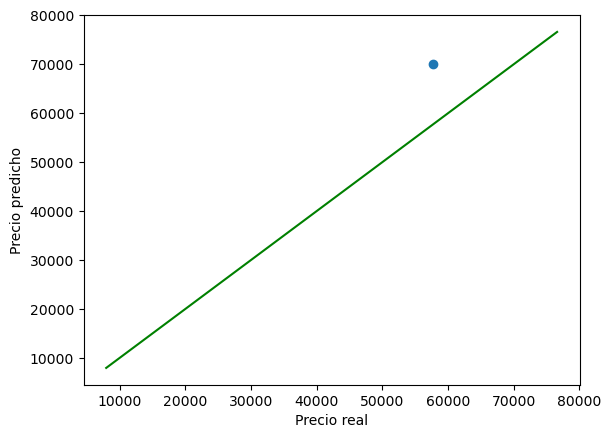

El precio promedio de una casa de esas características es: 57700.0
Es 12300.0 euros más caro
Opinión final: No es buena compra, su precio es caro comparado con el mercado actual


In [37]:
calculo_precio(casa1,precio_casa1,sobrecoste_limite)

In [38]:
casa2 = {'Area': 100, 
        'Garage': 1, 
        'FirePlace': 1, 
        'Baths': 1, 
        'White Marble': 1, 
        'Black Marble': 0, 
        'Indian Marble': 0, 
        'Floors': 0, 
        'City': 1, 
        'Solar': 1, 
        'Electric': 0, 
        'Fiber': 1, 
        'Glass Doors': 0, 
        'Swiming Pool': 1, 
        'Garden': 0}

precio_casa2 = 40000

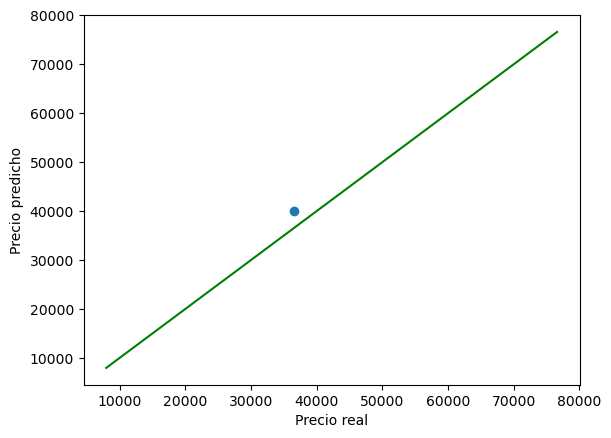

El precio promedio de una casa de esas características es: 36500.0
Es 3500.0 euros más caro
Opinión final: El precio es normal comparado con el mercado actual


In [39]:
calculo_precio(casa2,precio_casa2,sobrecoste_limite)

In [40]:
casa3 = {'Area': 90, 
        'Garage': 1, 
        'FirePlace': 1, 
        'Baths': 1, 
        'White Marble': 0, 
        'Black Marble': 0, 
        'Indian Marble': 1, 
        'Floors': 1, 
        'City': 1, 
        'Solar': 1, 
        'Electric': 0, 
        'Fiber': 0, 
        'Glass Doors': 0, 
        'Swiming Pool': 0, 
        'Garden': 0}

precio_casa3 = 17000

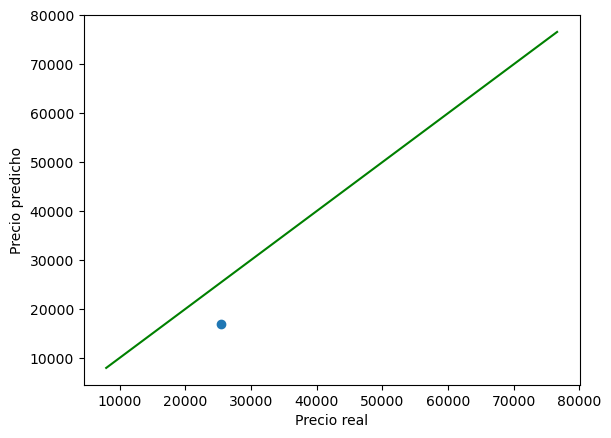

El precio promedio de una casa de esas características es: 25500.0
Es 8500.0 euros más barato
Opinión final: Es muy buena compra, su precio es más bajo que el mercado actual


In [41]:
calculo_precio(casa3,precio_casa3,sobrecoste_limite)